## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 讀取鳶尾花資料集, 可以看出是分類型問題
iris = datasets.load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)
print(y_pred)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]


In [4]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.0156062  0.62264163 0.36175217]


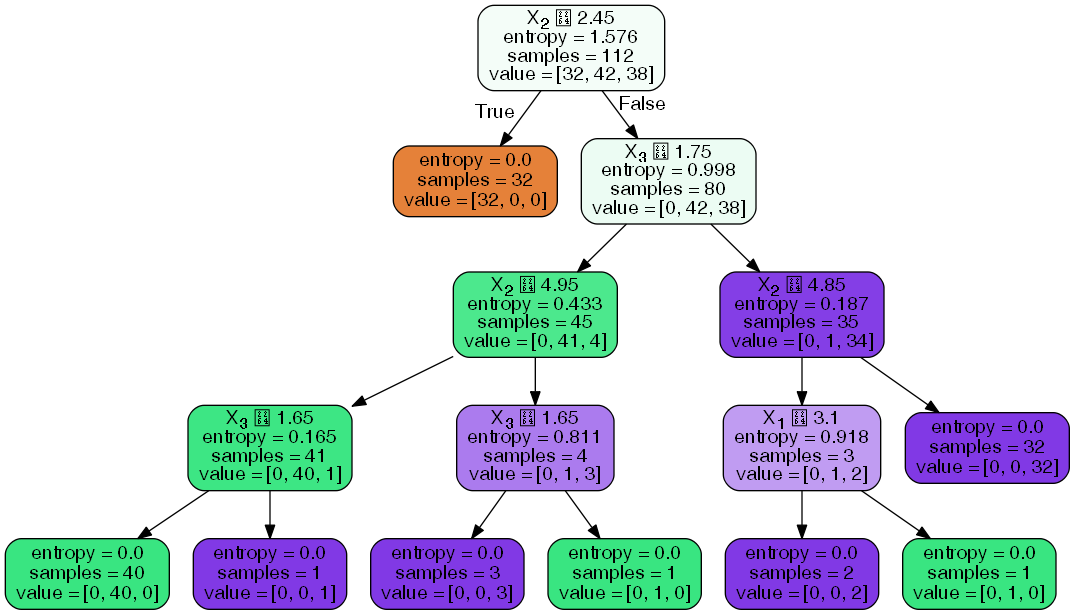

In [7]:
#可安裝額外的套件 graphviz，畫出決策樹的圖形幫助理解模型分類的準則
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

#因為graphviz安裝在此位置, 若沒加上下列2行, 則會找不到graphviz
import os
os.environ['PATH'] = os.environ['PATH'] + (';C:\\Users\\cathy\\AppData\\Local\\Continuum\\anaconda3\\Library\\bin\\graphviz\\')
#---------------------------------------------------------

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [8]:
# 讀取資料集, 可以看出是回歸型問題
boston = datasets.load_boston()
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeRegressor()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)
print(y_pred)

[14.4 22.  20.9 22.5 44.8 23.4 37.3 23.2 17.2 17.8 24.1 16.5 20.8 23.3
 23.2 13.8 16.2 12.8 11.9 14.8 13.1 17.8 20.5 20.1 20.4 20.4 13.4 14.5
 23.1 21.5  9.5 22.5 36.5 21.4 13.1  9.5 23.6 46.  25.  23.4 43.1 24.8
 12.7 29.9 27.5 20.9 50.  19.4 22.6 22.2 29.6 23.8 11.5 27.1 15.7 19.3
 22.  33.1 14.5 33.1 16.2 21.7 35.1 19.3 43.1 30.1 22.   8.3 22.5 23.1
 21.7 16.2 22.  30.1 20.5 36.2 15.  21.  17.7 20.1 22.5 15.6 27.9 23.
 25.  20.6 33.2 24.5 22.5 50.  29.1 50.  19.4 44.8 24.4 19.4 20.  27.5
 14.6 19.   8.3 19.4 34.9 14.5 23.4 19.9 37.3 30.3 50.  21.6 20.1 19.6
 13.1 35.1 33.8 36.2 50.  13.8  7.  19.4 21.2 12.5 23.7 22.6 16.2 24.4
 48.8]


In [13]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 26.11165354330709
MAE: 3.310236220472441


In [14]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.0671478  0.00134303 0.01026856 0.00067509 0.03698352 0.54252034
 0.01007383 0.06597764 0.00067817 0.01268907 0.01939817 0.00894651
 0.22329827]


In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())